# Credit Card Fraud Detection

Author: Maura E. Ramirez-Quezada

Description: The project uses the data set from (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download). It contains 31 features and 284807 rtransitions which 492 are fraudalent. Te dataset is highly invalanced, with fraudalent transciptions representing only 0.17% of the total.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


## Data exploration

We start by loading the dataset to understand its structure and asses data quality.

In [120]:

# Loading data
file_data = pd.read_csv('../data/creditcard.csv')

In [121]:
# basic info
print("(rows,columns):", file_data.shape)
print("dataset features:", file_data.columns)
print("Dataset structure")
print(file_data.head(1))
print("dataset null values")
print(file_data.isnull().sum())


(rows,columns): (284807, 31)
dataset features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Dataset structure
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  

[1 rows x 31 columns]
dataset null values
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V

No missing values were found. Features are anonymized (V1 to V28) plus "time" and the target column "Class"

In [122]:
# Class distribution
print(file_data['Class'].value_counts())
print(file_data['Class'].value_counts(normalize = True))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


## Sorting data for training

Separating features from output column 'Class' to inizialize the training

In [123]:
X_features = file_data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
Y_output = file_data['Class']
# Checking that X and Y are correct in dimension
print(X_features.shape)
print(Y_output.shape)


(284807, 30)
(284807,)


SPliting dataset for training and testing using the library sklearn.

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_output,test_size = 0.2, random_state = 42) # 80/20 
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(227845, 30) (56962, 30)
(227845,) (56962,)


## 1. Training: Logistic regression

In this section, we create the logistic linear regretion to train our model.

In [126]:
# Creating the model: max_iter = 10000 since it does not converge with the standard 100
model = LogisticRegression(max_iter= 10000)

# Training the model using .fit() from sklearn
model.fit(X_train,Y_train)


LogisticRegression(max_iter=10000)

In [ ]:
# Checking predictions of our model
Y_pred = model.predict(X_test)

In [ ]:
# Validating our model
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9991046662687406
Confusion Matrix:
 [[56855     9]
 [   42    56]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962




Now we will used the suggestions given for this dataset: 

_Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:


# Get predicted probabilities for the positive class (fraud)
y_probabilities = model.predict_proba(X_test)[:, 1]


# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_probabilities)
# recal: How many "frauds" are actually real
# precision: How precise are the predicted "frauds" 

# Calculate area under the curve (AUPRC)
pr_auc = auc(recall, precision)

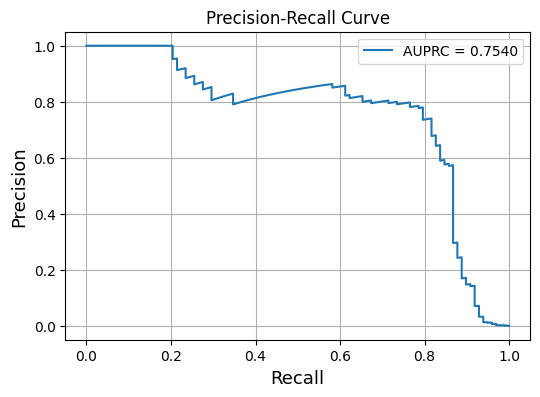

In [ ]:
# Plot the curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}")
plt.xlabel("Recall", size=13)
plt.ylabel("Precision", size = 13)
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Set new decision threshold
threshold = 0.3
# Apply threshold manyually
Y_pred_th = np.where(y_probabilities>threshold,1,0)
# Cunfusion matrix
cm = confusion_matrix(Y_test, Y_pred_th)

In [ ]:
# Evaluate
print(f"Threshold used: {threshold}")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_th))
print("Classification Report:\n", classification_report(Y_test, Y_pred_th))

Threshold used: 0.3
Confusion Matrix:
 [[56850    14]
 [   37    61]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.62      0.71        98

    accuracy                           1.00     56962
   macro avg       0.91      0.81      0.85     56962
weighted avg       1.00      1.00      1.00     56962



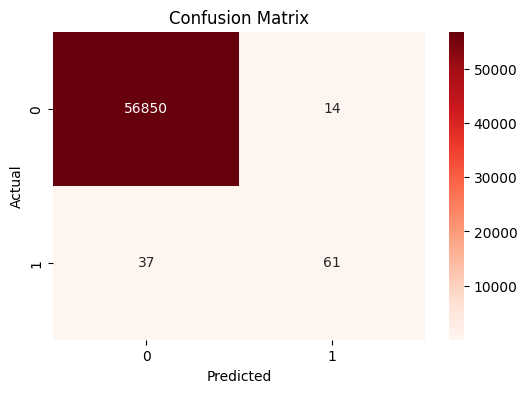

In [ ]:


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Although the model captures some fraudulent transactions, many are still missed. We will explore other techniques to improve recall.

## Model 2: Random Forest

In [ ]:
# Creating Random Forest Model: 25 full trees
rf_model = RandomForestClassifier(n_estimators = 25, random_state=42)

In [186]:
# Making the fit
rf_model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [187]:
# Checking predictions of our model
Y_pred_rf = rf_model.predict(X_test)

In [191]:
# Validating our model
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))
print("Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Accuracy: 0.9995435553526912
Confusion Matrix:
 [[56862     2]
 [   24    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [192]:
# Get predicted probabilities for the positive class (fraud)
y_probabilities_rf = rf_model.predict_proba(X_test)[:, 1]


# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_probabilities_rf)
# recal: How many "frauds" are actually real
# precision: How precise are the predicted "frauds" 

# Calculate area under the curve (AUPRC)
pr_auc = auc(recall, precision)

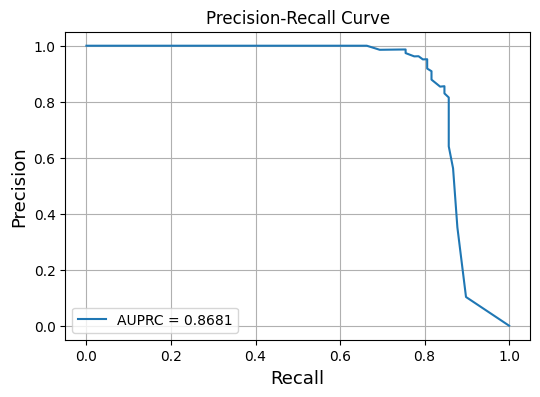

In [193]:
# Plot the curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}")
plt.xlabel("Recall", size=13)
plt.ylabel("Precision", size = 13)
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()